In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [3]:
men_results = pd.read_csv('men_results.csv', parse_dates=['date'])
men_results.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [4]:
women_results = pd.read_csv('women_results.csv', parse_dates=['date'])
women_results.head()

,date,home_team,away_team,home_score,away_score,tournament
0,01/11/1969,Italy,France,1,0,Euro
1,01/11/1969,Denmark,England,4,3,Euro
2,02/11/1969,England,France,2,0,Euro
3,02/11/1969,Italy,Denmark,3,1,Euro
4,25/08/1975,Thailand,Australia,3,2,AFC Championship


In [5]:
men_subset = men_results.loc[(men_results['date'] > '2002-01-01') & (men_results['tournament'] == 'FIFA World Cup')]
women_subset = women_results.loc[(women_results['date'] > '2002-01-01') & (women_results['tournament'] == 'FIFA World Cup')]

In [6]:
men_subset['goals_scored'] = men_subset['home_score'] + men_subset['away_score']
women_subset['goals_scored'] = women_subset['home_score'] + women_subset['away_score']

C:\Users\M S I\AppData\Local\Temp\ipykernel_29232\2017280077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset['goals_scored'] = men_subset['home_score'] + men_subset['away_score']
C:\Users\M S I\AppData\Local\Temp\ipykernel_29232\2017280077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset['goals_scored'] = women_subset['home_score'] + women_subset['away_score']


C:\Users\M S I\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


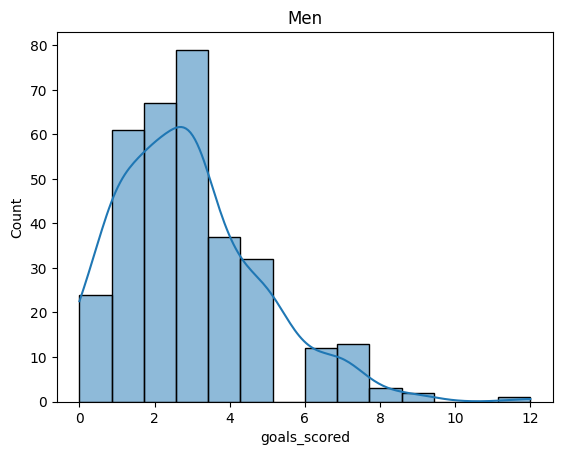

In [7]:
sns.histplot(x=men_subset['goals_scored'], kde=True)
plt.title('Men')
plt.show()

C:\Users\M S I\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


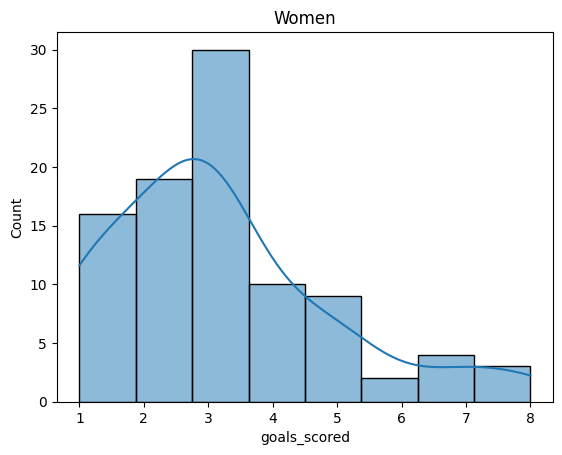

In [8]:
sns.histplot(x=women_subset['goals_scored'], kde=True)
plt.title('Women')
plt.show()

In [10]:
mwu_results = pg.mwu(x=women_subset['goals_scored'], y=men_subset['goals_scored'], alternative='greater')
p_val = mwu_results['p-val'].iloc[0]
mwu_results

,U-val,alternative,p-val,RBC,CLES
MWU,16785.0,greater,0.087344,0.090537,0.545268


In [ ]:
if p_val < 0.1:
    result = 'reject'
else:
    result